In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats


import statsmodels as sm
from statsmodels.regression.linear_model import OLS

In [5]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as web
import pandas_datareader.data as web

**Macroeconomics variables for the analysis:**

- Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
- Spot Crude Oil Price: West Texas Intermediate (WTI) (WTISPLC)
- 5-Year, 5-Year Forward Inflation Expectation Rate (T5YIFRM)
- Retail Sales: Retail Trade and Food Services (MRTSSM44X72USS)
- Industrial Production: Total Index (INDPRO)
- Real gross domestic product per capita (A939RX0Q048SBEA)
- Unemployment Rate (UNRATE)
- Federal Funds Effective Rate (FEDFUNDS)
- Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity (GS10)

In [28]:
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 12, 31)

In [31]:
macros = web.DataReader(['CPIAUCSL', 'WTISPLC','T5YIFRM','MRTSSM44X72USS','INDPRO','A939RX0Q048SBEA', 'UNRATE', 'FEDFUNDS', 'GS10'], 'fred', start, end)
macros.head(10)

,CPIAUCSL,WTISPLC,T5YIFRM,MRTSSM44X72USS,INDPRO,A939RX0Q048SBEA,UNRATE,FEDFUNDS,GS10
DATE,,,,,,,,,
2010-01-01,217.488,78.22,2.66,345959,89.2744,50036.0,9.8,0.11,3.73
2010-02-01,217.281,76.42,2.60,346895,89.5648,NaN,9.8,0.13,3.69
2010-03-01,217.353,81.24,2.57,354379,90.2296,NaN,9.9,0.16,3.73
2010-04-01,217.403,84.48,2.74,357365,90.5689,50424.0,9.9,0.20,3.85
2010-05-01,217.290,73.84,2.45,354299,91.8247,NaN,9.6,0.20,3.42
2010-06-01,217.199,75.35,2.22,353763,92.0070,NaN,9.4,0.18,3.20
2010-07-01,217.605,76.37,2.12,354665,92.3967,50706.0,9.4,0.18,3.01
2010-08-01,217.923,76.82,2.02,356810,92.7118,NaN,9.5,0.19,2.70
2010-09-01,218.275,75.31,2.20,359465,92.9252,NaN,9.5,0.19,2.65


In [33]:
macros.tail(10)

,CPIAUCSL,WTISPLC,T5YIFRM,MRTSSM44X72USS,INDPRO,A939RX0Q048SBEA,UNRATE,FEDFUNDS,GS10
DATE,,,,,,,,,
2020-03-01,258.165,29.21,1.30,480407,97.4477,NaN,4.4,0.65,0.87
2020-04-01,256.094,16.55,1.45,409819,84.2018,52031.0,14.7,0.05,0.66
2020-05-01,255.944,28.56,1.47,484295,85.8434,NaN,13.2,0.05,0.67
2020-06-01,257.217,38.31,1.53,526187,91.1622,NaN,11.0,0.08,0.73
2020-07-01,258.543,40.71,1.60,533517,94.8887,55933.0,10.2,0.09,0.62
2020-08-01,259.580,42.34,1.77,537980,95.8924,NaN,8.4,0.10,0.65
2020-09-01,260.190,39.63,1.78,549211,95.6019,NaN,7.9,0.09,0.68
2020-10-01,260.352,39.40,1.85,548930,96.6454,56533.0,6.9,0.09,0.79
2020-11-01,260.721,40.94,1.80,540495,97.1609,NaN,6.7,0.09,0.87


In [45]:
macros1 = macros.resample(rule = 'M').last()
macros1

,CPIAUCSL,WTISPLC,T5YIFRM,MRTSSM44X72USS,INDPRO,A939RX0Q048SBEA,UNRATE,FEDFUNDS,GS10
DATE,,,,,,,,,
2010-01-31,217.488,78.22,2.66,345959,89.2744,50036.0,9.8,0.11,3.73
2010-02-28,217.281,76.42,2.60,346895,89.5648,NaN,9.8,0.13,3.69
2010-03-31,217.353,81.24,2.57,354379,90.2296,NaN,9.9,0.16,3.73
2010-04-30,217.403,84.48,2.74,357365,90.5689,50424.0,9.9,0.20,3.85
2010-05-31,217.290,73.84,2.45,354299,91.8247,NaN,9.6,0.20,3.42
...,...,...,...,...,...,...,...,...,...
2020-08-31,259.580,42.34,1.77,537980,95.8924,NaN,8.4,0.10,0.65
2020-09-30,260.190,39.63,1.78,549211,95.6019,NaN,7.9,0.09,0.68
2020-10-31,260.352,39.40,1.85,548930,96.6454,56533.0,6.9,0.09,0.79


In [56]:
macros1.isnull().sum()

CPIAUCSL            0
WTISPLC             0
T5YIFRM             0
MRTSSM44X72USS      0
INDPRO              0
A939RX0Q048SBEA    88
UNRATE              0
FEDFUNDS            0
GS10                0
dtype: int64

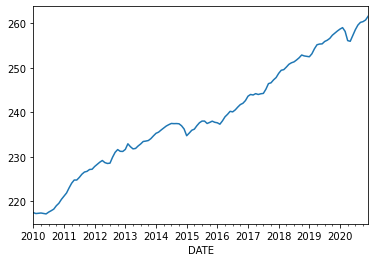

In [57]:
macros1['CPIAUCSL'].plot()

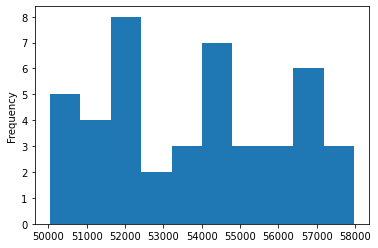

In [59]:
macros1['A939RX0Q048SBEA'].plot(kind ='hist')

**Real GDP per capita is only available 5 times a year** (Jan, April, July, October, December). Because of that we are using the **forward filling function** to replace the NaN with the last known number. 

In [60]:
macros2 = macros1.ffill()
macros2

,CPIAUCSL,WTISPLC,T5YIFRM,MRTSSM44X72USS,INDPRO,A939RX0Q048SBEA,UNRATE,FEDFUNDS,GS10
DATE,,,,,,,,,
2010-01-31,217.488,78.22,2.66,345959,89.2744,50036.0,9.8,0.11,3.73
2010-02-28,217.281,76.42,2.60,346895,89.5648,50036.0,9.8,0.13,3.69
2010-03-31,217.353,81.24,2.57,354379,90.2296,50036.0,9.9,0.16,3.73
2010-04-30,217.403,84.48,2.74,357365,90.5689,50424.0,9.9,0.20,3.85
2010-05-31,217.290,73.84,2.45,354299,91.8247,50424.0,9.6,0.20,3.42
...,...,...,...,...,...,...,...,...,...
2020-08-31,259.580,42.34,1.77,537980,95.8924,55933.0,8.4,0.10,0.65
2020-09-30,260.190,39.63,1.78,549211,95.6019,55933.0,7.9,0.09,0.68
2020-10-31,260.352,39.40,1.85,548930,96.6454,56533.0,6.9,0.09,0.79
